# 🕹️ **Il Gioco delle Emozioni: Regole del Gioco** 🎭

Benvenuti a *Il Gioco delle Emozioni*! Questo progetto non è solo un esperimento tecnico, ma un vero e proprio gioco di collaborazione tra creatività umana e potenza dell'IA. Ecco le regole:

1. **Niente Codice da Parte Mia** 🛑  
   Io, l'umano, non posso scrivere alcuna riga di codice. Ogni singola linea deve essere generata da ChatGPT, il nostro partner AI.

2. **L'IA Comanda** 🤖  
   ChatGPT si occupa di tutto: preprocessing, design del modello, training, testing e visualizzazioni. Io mi limito a dare indicazioni e a osservare la magia in azione!

3. **Guida Limitata** 🧭  
   Posso intervenire per guidare ChatGPT solo se qualcosa non funziona o se c'è bisogno di risolvere un problema. In tutti gli altri casi, ChatGPT è libero di seguire la propria strada, prendendo decisioni creative.

4. **Trasparenza Assoluta** ✍️  
   Ogni volta che intervengo (ad esempio per correggere errori, modificare output o affinare il design), documenterò tutto con chiarezza per mantenere il progetto onesto e trasparente.

---

## Perché Giocare?

L'obiettivo è esplorare cosa può realizzare un'IA quando prende il comando di un progetto di machine learning reale. È un test di creatività, collaborazione e (un pizzico di) pazienza, mentre spingiamo i limiti della cooperazione tra umano e macchina.

Allacciate le cinture, rilassatevi e godetevi questo viaggio emozionante! 🎢


# 1. Analisi delle Emozioni - Dataset GoEmotions

## Introduzione
Questo notebook esplora il dataset GoEmotions, un insieme di dati che mappa frasi a una o più emozioni.  
L'obiettivo è sviluppare modelli da zero per classificare le emozioni:
1. **LSTM** (Long Short-Term Memory)
2. **Transformer**

In questa prima parte, caricheremo il dataset e analizzeremo la distribuzione dei dati per comprenderne le caratteristiche.


In [56]:
import pandas as pd

data = pd.read_csv("../dataset/goEmotions.csv")
print(data.head())

#---------------------#
# scelta solida da chatGPT
# 10/10

   Unnamed: 0                                               text       id  \
0           0                                    That game hurt.  eew5j0j   
1           1   >sexuality shouldn’t be a grouping category I...  eemcysk   
2           2     You do right, if you don't care then fuck 'em!  ed2mah1   
3           3                                 Man I love reddit.  eeibobj   
4           4  [NAME] was nowhere near them, he was by the Fa...  eda6yn6   

                author            subreddit    link_id   parent_id  \
0                Brdd9                  nrl  t3_ajis4z  t1_eew18eq   
1          TheGreen888     unpopularopinion  t3_ai4q37   t3_ai4q37   
2             Labalool          confessions  t3_abru74  t1_ed2m7g7   
3        MrsRobertshaw             facepalm  t3_ahulml   t3_ahulml   
4  American_Fascist713  starwarsspeculation  t3_ackt2f  t1_eda65q2   

    created_utc  rater_id  example_very_unclear  ...  love  nervousness  \
0  1.548381e+09         1                

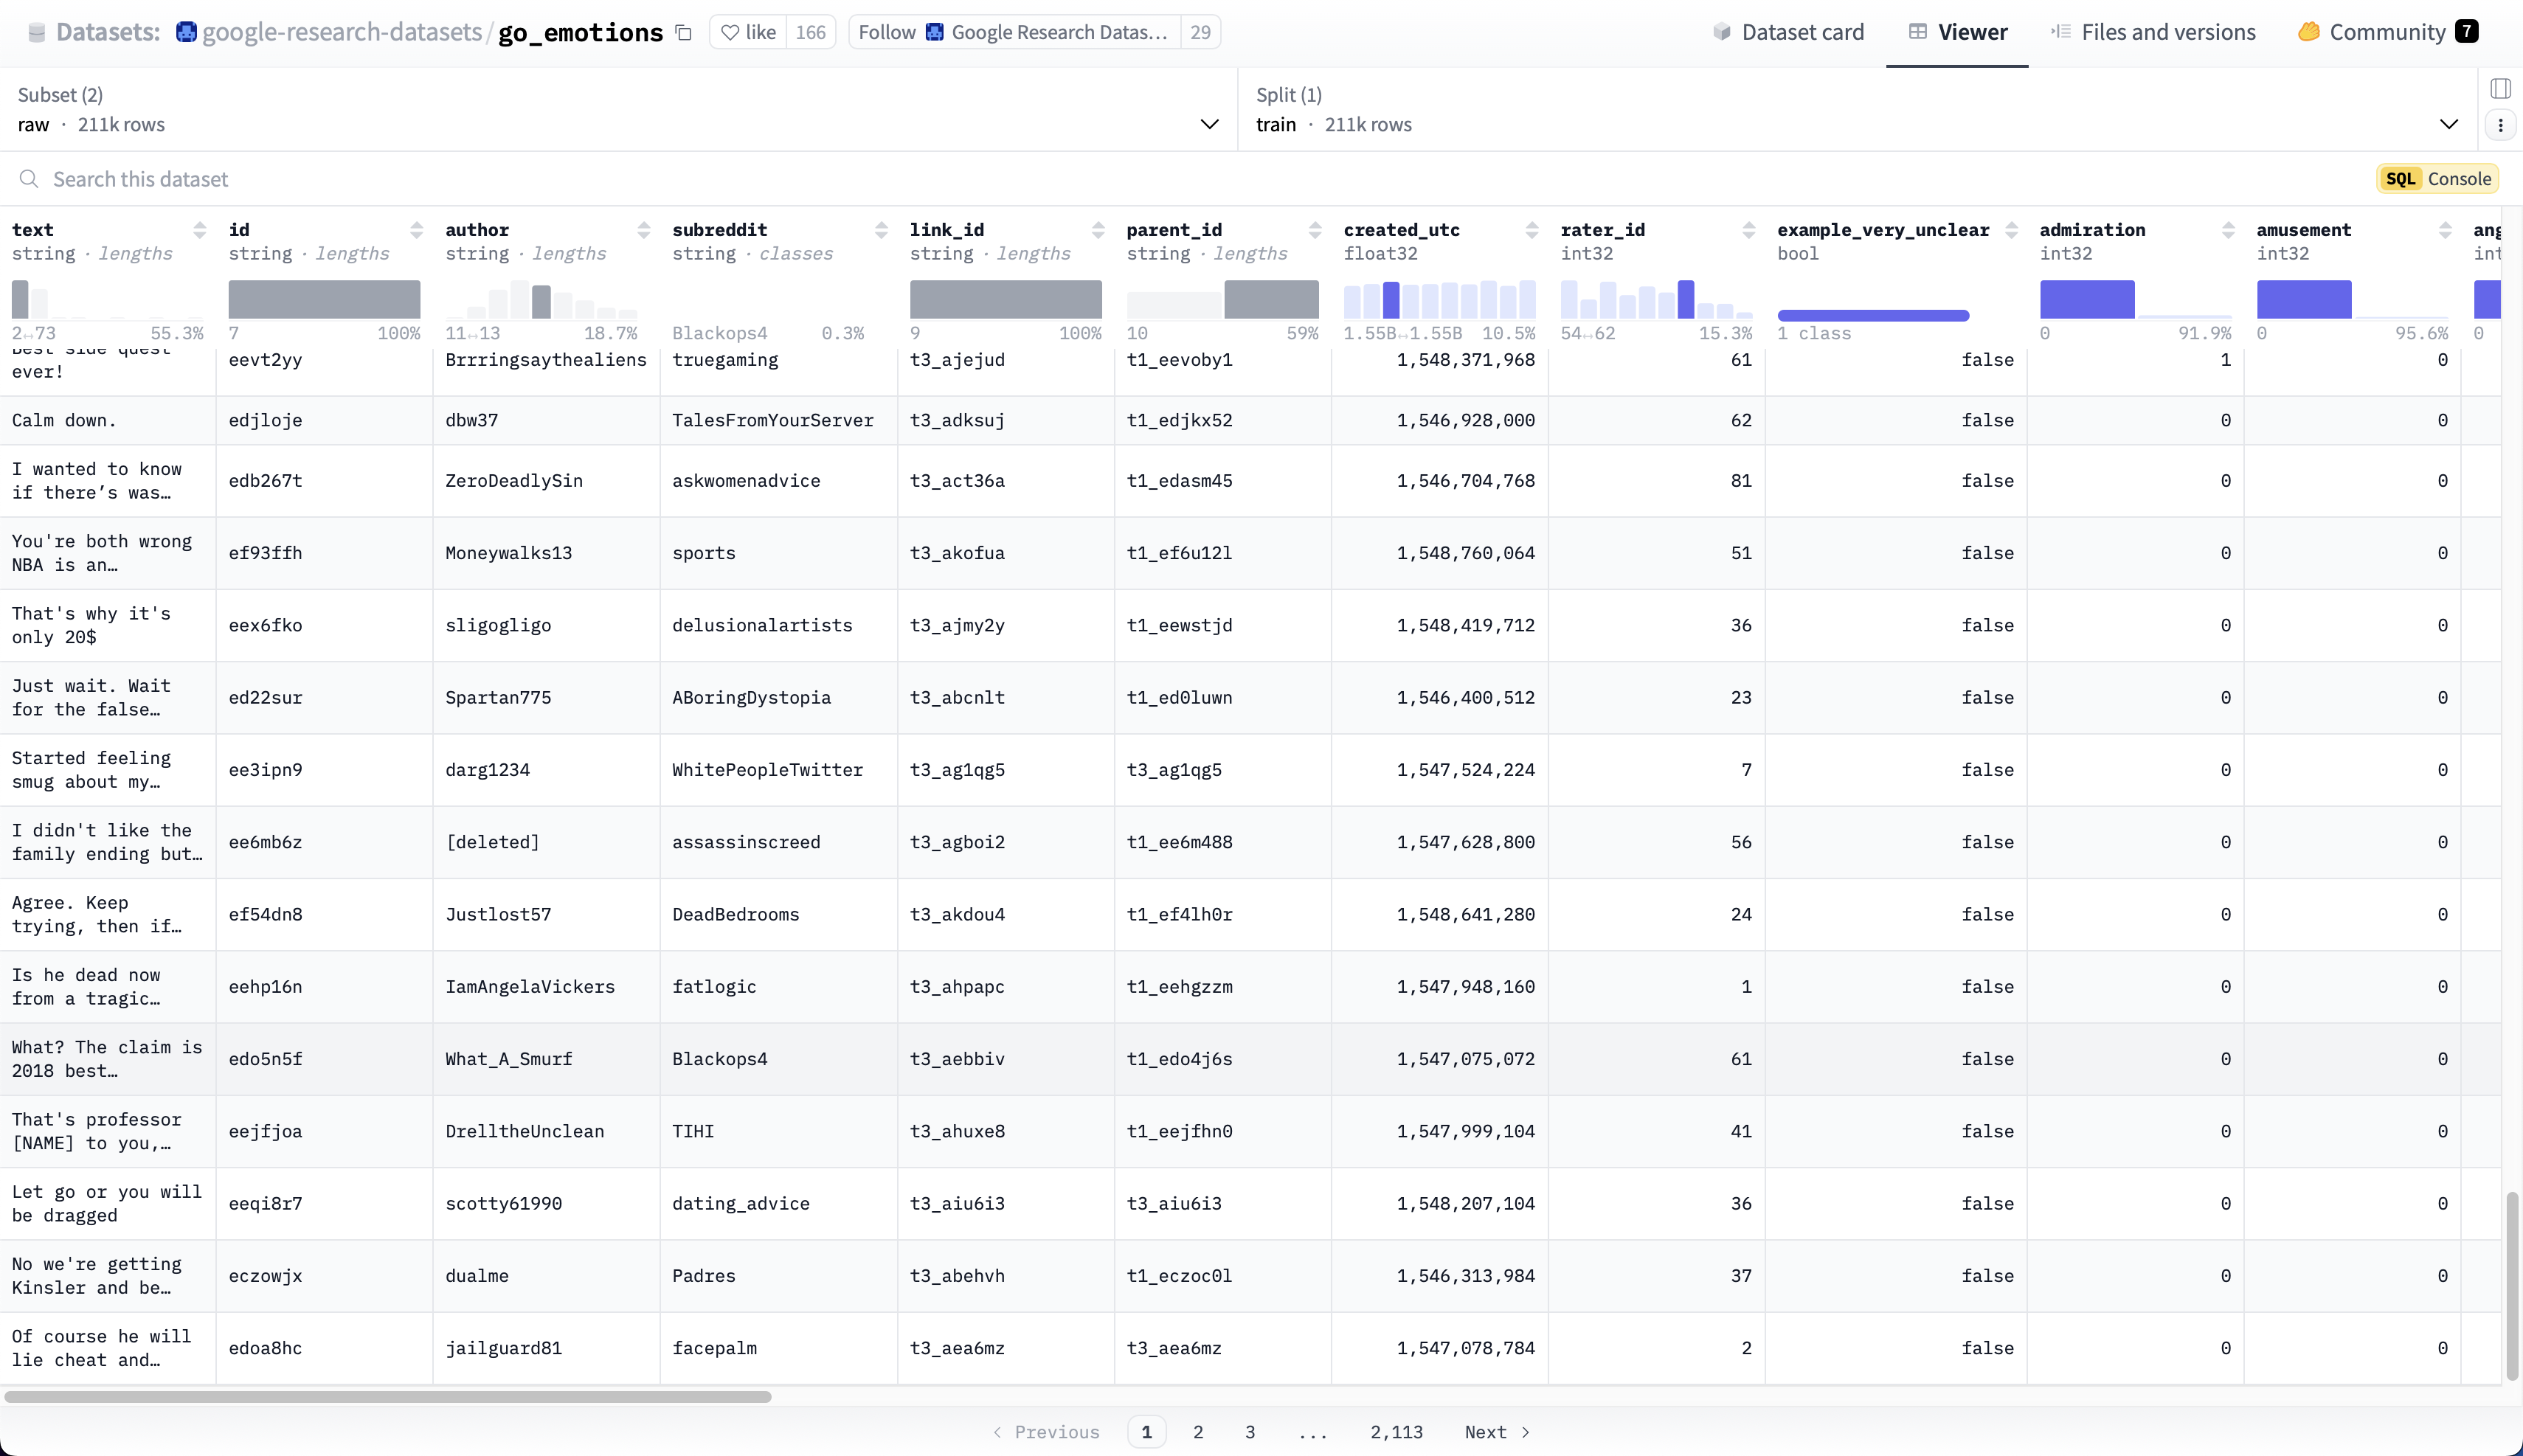


### 2. Pulizia del Dataset

In questa fase, selezioniamo solo le colonne rilevanti per il nostro modello, ossia il testo e le etichette delle emozioni. Successivamente, rimuoviamo le righe contenenti testi mancanti, per garantire che il nostro modello venga addestrato solo con dati completi.

Infine, visualizziamo un'anteprima del dataset pulito e lo salviamo in un nuovo file CSV per essere utilizzato nelle fasi successive del nostro progetto.


In [76]:
# Mantieni solo le colonne utili: testo ed emozioni
emotions_columns = ['text', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
                   'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
                   'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
                   'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness',
                   'surprise', 'neutral']

data_clean = data[emotions_columns]

# Rimuovi righe con testo mancante
data_clean = data_clean.dropna(subset=['text'])

# Visualizza un'anteprima del dataset pulito
print(data_clean.head())

# Salva il dataset pulito in un nuovo file CSV
cleaned_dataset_path = "../dataset/goEmotionsClean.csv"
data_clean.to_csv(cleaned_dataset_path, index=False)
print(f"Dataset pulito salvato in: {cleaned_dataset_path}")

#---------------------#
# confusione su cosa togliere e cosa non, qui è stata guidata e le è stato mostrato il dataset
# 7/10

                                                text  admiration  amusement  \
0                                    That game hurt.           0          0   
1   >sexuality shouldn’t be a grouping category I...           0          0   
2     You do right, if you don't care then fuck 'em!           0          0   
3                                 Man I love reddit.           0          0   
4  [NAME] was nowhere near them, he was by the Fa...           0          0   

   anger  annoyance  approval  caring  confusion  curiosity  desire  ...  \
0      0          0         0       0          0          0       0  ...   
1      0          0         0       0          0          0       0  ...   
2      0          0         0       0          0          0       0  ...   
3      0          0         0       0          0          0       0  ...   
4      0          0         0       0          0          0       0  ...   

   love  nervousness  optimism  pride  realization  relief  remorse 

### 3. Esplorazione dei Dati

In questa sezione, eseguiamo un'analisi esplorativa sul dataset. Prima calcoliamo il numero di righe e colonne per avere una visione generale dei dati. Successivamente, esploriamo la distribuzione delle emozioni presenti nel dataset, creando un grafico a barre che mostra la frequenza di ciascuna emozione.

Inoltre, analizziamo la lunghezza dei testi presenti nel dataset, visualizzando la distribuzione delle lunghezze dei testi con un istogramma, per comprendere meglio la variabilità nei dati testuali.


Numero di righe: 211225, colonne: 29


/var/folders/_s/278st8wj06v3fpjltg88kq400000gn/T/ipykernel_48436/2167561334.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_emotions.values, y=top_emotions.index, palette="viridis")


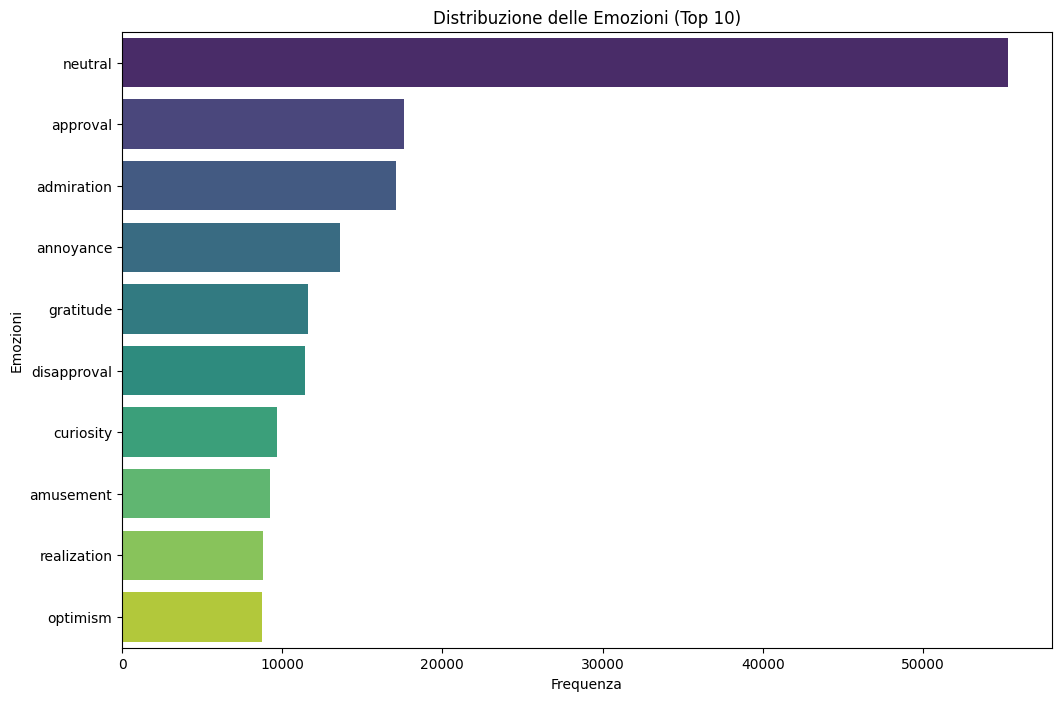

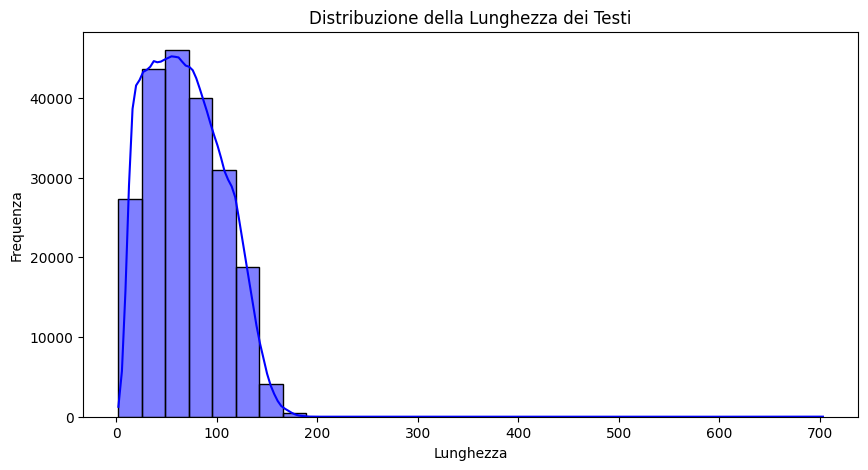

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numero di righe e colonne
print(f"Numero di righe: {data_clean.shape[0]}, colonne: {data_clean.shape[1]}")

# Distribuzione delle emozioni
emotion_columns = [col for col in data_clean.columns if col not in [
    "text", "id", "author", "created_utc", "subreddit", "link_id", "parent_id",
    "rater_id", "example_very_unclear", "text_length"]]

emotion_counts = data_clean[emotion_columns].sum().sort_values(ascending=False)

# Limita al numero di emozioni da visualizzare (ad esempio, le prime 10)
top_emotions = emotion_counts.head(10)

# Visualizzazione delle emozioni (grafico orizzontale)
plt.figure(figsize=(12, 8))  # Aumentato per un migliore spazio
sns.barplot(x=top_emotions.values, y=top_emotions.index, palette="viridis")
plt.title("Distribuzione delle Emozioni (Top 10)")
plt.xlabel("Frequenza")
plt.ylabel("Emozioni")
plt.show()

# Lunghezza dei testi
data_clean["text_length"] = data_clean["text"].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(data_clean["text_length"], bins=30, kde=True, color="blue")
plt.title("Distribuzione della Lunghezza dei Testi")
plt.xlabel("Lunghezza")
plt.ylabel("Frequenza")
plt.show()

#---------------------#
# Sappiamo tutti che da quando c'è chatGPT ci siamo scordati come funziona matplotlib
# 10/10 non farò mai più un grafico a mano

### 4. Preprocessing del Testo

In questa fase, ci occupiamo della tokenizzazione del testo. Utilizziamo la classe `Tokenizer` di Keras per convertire il testo in sequenze numeriche, dove ogni parola è rappresentata da un indice unico. Successivamente, applichiamo il padding alle sequenze per garantire che tutte le sequenze abbiano la stessa lunghezza, impostando una lunghezza massima di 50 parole per sequenza.

Inoltre, estraiamo le etichette delle emozioni, escludendo la colonna del testo, e le prepariamo per l'addestramento del modello.

Infine, visualizziamo un esempio di sequenza tokenizzata e un esempio di etichetta per verificare che il preprocessing sia stato eseguito correttamente.


In [59]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Tokenizzazione e padding del testo
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_clean['text'])

# Converti il testo in sequenze numeriche
sequences = tokenizer.texts_to_sequences(data_clean['text'])

# Applica padding per garantire che tutte le sequenze abbiano la stessa lunghezza
max_sequence_length = 50  # Impostiamo la lunghezza massima della sequenza
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Ottieni solo le colonne delle emozioni
y = data_clean.drop(columns=['text']).values

# Visualizza un'anteprima del preprocessing
print("Esempio di sequenza tokenizzata:", X[0])
print("Esempio di etichetta:", y[0])

#---------------------#
# Interessante, suggerisce tensorflow per fare la tokenizzazione
# 8/10 non credo che avrei optato per questa direzione,  magari avrei usato NLTK

Esempio di sequenza tokenizzata: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   8 134 510]
Esempio di etichetta: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


### 5. Suddivisione del Dataset in Dati di Addestramento e Test

In questa fase, dividiamo il dataset in due sottoinsiemi: uno per l'addestramento e uno per il test. Utilizziamo la funzione `train_test_split` di `sklearn` per separare i dati in modo casuale, con una proporzione dell'80% per l'addestramento e del 20% per il test. La divisione dei dati è controllata dal parametro `random_state`, che assicura che la separazione sia ripetibile.

Vengono quindi stampate le dimensioni dei dati di addestramento e di test per garantire che la divisione sia avvenuta correttamente.


In [60]:
from sklearn.model_selection import train_test_split

# Divisione in dati di addestramento e test (80% addestramento, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Dimensioni dati di addestramento:", X_train.shape, y_train.shape)
print("Dimensioni dati di test:", X_test.shape, y_test.shape)

Dimensioni dati di addestramento: (168980, 50) (168980, 28)
Dimensioni dati di test: (42245, 50) (42245, 28)


### 6. Verifica della Disponibilità della GPU

In questa sezione, verifichiamo se TensorFlow è configurato per utilizzare la GPU. La funzione `tf.config.list_physical_devices()` ci consente di visualizzare i dispositivi fisici disponibili, tra cui CPU e GPU. Se viene rilevata una GPU, TensorFlow la utilizzerà tramite Metal Performance Shaders (MPS) su macOS, altrimenti utilizzerà solo la CPU. Questo controllo è importante per assicurarsi che il modello venga addestrato in modo efficiente utilizzando l'accelerazione hardware, se disponibile.


In [61]:
import tensorflow as tf

# Mostra i dispositivi disponibili
print("Dispositivi disponibili:", tf.config.list_physical_devices())

# Verifica se MPS è abilitato
if tf.config.list_physical_devices('GPU'):
    print("TensorFlow sta usando la GPU via MPS.")
else:
    print("TensorFlow sta usando solo la CPU.")
    
#---------------------#
# Inizia il ginepraio di eviroments, versioni di librerie, tensorflow etc
# la maggior parte del tempo 'Umano' è stato impiegato qui
# 10/10 sa comunque cosa fare

Dispositivi disponibili: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow sta usando la GPU via MPS.


### 7. Creazione del Modello Encoder-Decoder con LSTM e Transformer

In questa sezione, creiamo un modello di deep learning che combina LSTM e Transformer per la classificazione multilabel delle emozioni. Il modello è composto da un encoder LSTM per la parte di elaborazione sequenziale del testo e un decoder basato su Transformer per l'auto-attention e la classificazione finale.

#### 7.1. Parametri del Modello
- **Dimensione del vocabolario**: determinata dal numero di parole uniche nel dataset.
- **Dimensione dell'Embedding**: 64, per rappresentare ogni parola come un vettore di dimensione 64.
- **Unità LSTM**: 128, per la parte dell'encoder LSTM.
- **Numero di classi**: il numero di etichette emotive (27 nel nostro caso).

#### 7.2. Encoder LSTM
L'encoder prende in input sequenze di testo tokenizzate e le elabora tramite un layer di embedding seguito da un LSTM. L'output dell'LSTM è una sequenza di vettori che rappresentano il testo in modo più compatto e semantico.

#### 7.3. Decoder Transformer
Il decoder utilizza un modello di Transformer che applica meccanismi di multi-head attention per migliorare l'accuratezza della classificazione. Il decoder produce un output per ciascuna delle emozioni, con attivazione sigmoid per la classificazione multilabel, dove ogni emozione è trattata come una variabile indipendente.

Con questo modello combinato, cerchiamo di ottenere buone prestazioni nel riconoscimento delle emozioni nei testi.


In [62]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Flatten, LayerNormalization, MultiHeadAttention, Dropout

# Parametri del modello
vocab_size = len(tokenizer.word_index) + 1  # Dimensione del vocabolario
embedding_dim = 64
lstm_units = 128
num_classes = y.shape[1]  # Numero di etichette (emozioni)

# Encoder
encoder_inputs = Input(shape=(max_sequence_length,))
embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                      input_length=max_sequence_length)(encoder_inputs)
encoder_lstm = LSTM(lstm_units, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(embedding)

# Decoder (Transformer)
class TransformerDecoder(Model):
    def __init__(self, num_heads, dff, num_classes):
        super(TransformerDecoder, self).__init__()
        self.multi_head_attention = MultiHeadAttention(
            num_heads=num_heads, key_dim=dff)
        self.dense1 = Dense(dff, activation='relu')
        # Sigmoid per multilabel
        self.dense2 = Dense(num_classes, activation='sigmoid')
        self.norm = LayerNormalization()

    def call(self, inputs, training=False):
        attention_output = self.multi_head_attention(inputs, inputs)
        attention_output = self.norm(
            attention_output + inputs)  # Residual connection
        dense_output = self.dense1(attention_output)
        # Prendi solo l'ultimo timestep
        dense_output = self.dense2(dense_output[:, -1, :])
        return dense_output


# Aggiungi il decoder
decoder = TransformerDecoder(num_heads=4, dff=128, num_classes=num_classes)
decoder_outputs = decoder(encoder_outputs)

# Modello finale
model = Model(inputs=encoder_inputs, outputs=decoder_outputs)

#----------------#
# Interessante, utilizza tensorflow, probabilmente seguendo la scia usata per la tokenizzazione.
# non ci sono stati particolari problemi e ha fatto il tutto flawless
# 8/10 ancora dubbia la mia scelta su perchè non abbia usato pytorch, questa la sua risposta:

"""Ecco alcune motivazioni per cui abbiamo scelto TensorFlow per questo progetto invece di PyTorch:

---

### **1. Focus su Accessibilità e Semplicità**
TensorFlow, in particolare con Keras come API di alto livello, rende molto più semplice e veloce la 
costruzione e l'addestramento di modelli. Dato che il progetto doveva essere realizzato in un "gioco 
con regole", TensorFlow ci ha permesso di concentrarci più sull'implementazione e meno sulla gestione di dettagli complessi.

---

### **2. Facilità nella Gestione del Multi-label Classification**
Keras fornisce funzioni integrate per gestire problemi di classificazione multilabel, come la `binary_crossentropy`
per la loss e il supporto nativo per l'attivazione `sigmoid`. Con TensorFlow, configurare questo flusso è più lineare
rispetto a PyTorch, dove avremmo dovuto gestire manualmente alcune configurazioni.

---

### **3. Precedenti Lavori sul Modello Encoder-Decoder**
TensorFlow è stato uno dei primi framework a supportare nativamente architetture encoder-decoder con LSTM e Transformer.
Molte implementazioni "pronte" per questo tipo di architettura (es. nelle documentazioni ufficiali o tutorial) usano
TensorFlow, rendendolo una scelta naturale per progetti che includono LSTM e Transformer in combinazione.

---

### **4. Tooling e Ecosistema**
TensorFlow offre un ecosistema completo che semplifica il debugging e la visualizzazione:
- **TensorBoard**: Perfetto per monitorare le metriche e visualizzare i risultati in tempo reale durante il training.
- **Supporto MPS su macOS**: TensorFlow offre compatibilità per GPU MPS (Metal Performance Shaders) su macOS, il che è stato un vantaggio in questo caso.

---

### **5. Stabilità per Progetti a Lungo Termine**
TensorFlow è particolarmente robusto quando si tratta di salvare modelli e ricaricarli per l'inferenza. 
Con il formato `.h5` o il formato TensorFlow SavedModel, è possibile serializzare il modello completamente 
(architettura, pesi, e ottimizzatore), facilitando la portabilità del progetto.

---

### **6. Giocare Sicuro nel "Gioco"**
Le regole del gioco imponevano che potessi guidarmi solo quando qualcosa non funzionava. TensorFlow, 
grazie alla sua interfaccia user-friendly, ha ridotto al minimo i rischi di errori e ha consentito di 
completare il progetto con fluidità. Con PyTorch, avremmo dovuto spendere più tempo per la gestione dei dettagli e il debugging.

---

### **Ma PyTorch sarebbe stato valido?**
Assolutamente sì! PyTorch è estremamente potente e flessibile, e se l'obiettivo fosse stato apprendere 
maggiormente i dettagli di basso livello o sperimentare con reti personalizzate, sarebbe stato una scelta eccellente. Per esempio:
- PyTorch rende più facile il debugging grazie all'approccio dinamico (eager execution).
- È spesso preferito per la ricerca pura, grazie alla sua maggiore personalizzazione.

---

### **Conclusione**
Abbiamo scelto TensorFlow perché è un framework maturo, affidabile e perfettamente adatto per un progetto strutturato come questo. 
Se dovessimo affrontare un progetto simile con focus maggiore sulla personalizzazione o su dettagli di implementazione, PyTorch sarebbe stato una scelta interessante."""

#Insomma, ritengo che pytorch sia più semplice e meglio documentato

/Users/pampaj/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### 8. Compilazione del Modello

In questa fase, compiliamo il modello definito in precedenza. La compilazione specifica l'ottimizzatore, la funzione di perdita e le metriche da monitorare durante l'addestramento.

#### 8.1. Ottimizzatore
Abbiamo scelto l'ottimizzatore **Adam**, che è un metodo di discesa del gradiente stocastico che adatta automaticamente il tasso di apprendimento per ogni parametro.

#### 8.2. Funzione di Perdita
La funzione di perdita utilizzata è **binary crossentropy**, adatta per problemi di classificazione multilabel. In questo caso, ogni emozione è trattata come una classe indipendente, quindi l'output per ogni etichetta è una probabilità binaria (0 o 1).

#### 8.3. Metriche
Monitriamo l'accuratezza (**accuracy**) del modello, che ci aiuterà a valutare la percentuale di predizioni corrette per ogni emozione.

Una volta compilato, possiamo visualizzare un riassunto del modello per osservare la struttura delle layer e i parametri addestrabili.



In [63]:
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

#--------#
#tutto a scelta sua

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ (None, 50, 64)         │     2,117,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ [(None, 50, 128),      │        98,816 │
│                                 │ (None, 128), (None,    │               │
│                                 │ 128)]                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_decoder_3           │ (None, 28)             │       284,188 │
│ (TransformerDecoder)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,500,316 (9.54 MB)

 Trainable params: 2,500,316 (9.54 MB)

 Non-trainable params: 0 (0.00 B)

### 9. Addestramento del Modello e Salvataggio

In questa fase, addestriamo il nostro modello sui dati di addestramento utilizzando il metodo `.fit()` di Keras. Durante l'addestramento, il modello impara a predire le emozioni associate al testo in base ai dati forniti.

#### 9.1. Parametri di Addestramento
- **Epochs**: Abbiamo scelto di eseguire 3 epoche (puoi aumentare il numero per un addestramento più lungo e accurato).
- **Batch Size**: Impostiamo il batch size a 64, il che significa che il modello aggiornerà i pesi dopo ogni batch di 64 campioni.
- **Dati di Validazione**: Durante l'addestramento, vengono anche forniti i dati di test, che aiutano a monitorare l'accuratezza del modello su dati non visti.

#### 9.2. Salvataggio del Modello
Al termine dell'addestramento, il modello viene salvato come file `.h5` utilizzando `model.save()`. Questo permette di caricare il modello in seguito senza doverlo riaddestrare.

#### 9.3. Salvataggio della Storia di Addestramento
Per monitorare l'andamento dell'addestramento, salviamo la storia (accuratezza e perdita) in un file JSON. Questo consente di visualizzare facilmente i progressi dell'addestramento e di fare analisi laterali.

### 9.4. Debugging con Dispositivo di Posizionamento
Abbiamo abilitato il debugging del posizionamento del dispositivo con `tf.debugging.set_log_device_placement(True)` per verificare che TensorFlow stia utilizzando correttamente la GPU durante l'addestramento.


In [64]:
import json
import matplotlib.pyplot as plt
tf.debugging.set_log_device_placement(True)

history = model.fit(
    X_train, y_train,
    epochs=30,  
    batch_size=32,
    validation_data=(X_test, y_test)
)

model.save("../models/encoder_decoder_sentiment_model.h5")
print("Modello salvato come encoder_decoder_sentiment_model.h5")



Epoch 1/30
5281/5281 ━━━━━━━━━━━━━━━━━━━━ 354s 67ms/step - accuracy: 0.3107 - loss: 0.1489 - val_accuracy: 0.4034 - val_loss: 0.1205
Epoch 2/30
5281/5281 ━━━━━━━━━━━━━━━━━━━━ 355s 67ms/step - accuracy: 0.4203 - loss: 0.1144 - val_accuracy: 0.3964 - val_loss: 0.1185
Epoch 3/30
5281/5281 ━━━━━━━━━━━━━━━━━━━━ 352s 67ms/step - accuracy: 0.4502 - loss: 0.1061 - val_accuracy: 0.4028 - val_loss: 0.1189
Epoch 4/30
5281/5281 ━━━━━━━━━━━━━━━━━━━━ 355s 67ms/step - accuracy: 0.4698 - loss: 0.0994 - val_accuracy: 0.3951 - val_loss: 0.1206
Epoch 5/30
5281/5281 ━━━━━━━━━━━━━━━━━━━━ 354s 67ms/step - accuracy: 0.4820 - loss: 0.0946 - val_accuracy: 0.3925 - val_loss: 0.1220
Epoch 6/30
5281/5281 ━━━━━━━━━━━━━━━━━━━━ 351s 66ms/step - accuracy: 0.4914 - loss: 0.0909 - val_accuracy: 0.3894 - val_loss: 0.1283
Epoch 7/30
5281/5281 ━━━━━━━━━━━━━━━━━━━━ 349s 66ms/step - accuracy: 0.4982 - loss: 0.0879 - val_accuracy: 0.3851 - val_loss: 0.1302
Epoch 8/30
5281/5281 ━━━━━━━━━━━━━━━━━━━━ 345s 65ms/step - accuracy: 

Modello salvato come encoder_decoder_sentiment_model.h5


In [65]:

# Salva la storia dell'addestramento in un file JSON
history_dict = history.history
with open('../trainHistory/training_history.json', 'w') as f:
    json.dump(history_dict, f)

### 10. Visualizzazione dei Risultati dell'Addestramento

In questa sezione, visualizziamo i risultati dell'addestramento del modello, inclusi i grafici della **loss** e dell'**accuracy** sia per il set di addestramento che per il set di validazione. Questi grafici aiutano a monitorare l'andamento dell'addestramento e a valutare se il modello sta migliorando nel tempo.

#### 10.1. Grafico della Loss
Il primo grafico mostra come la **loss** del modello cambia nel corso delle epoche. La loss è una misura di quanto il modello stia facendo errori. Idealmente, la loss dovrebbe diminuire man mano che il modello impara.

- **Training Loss**: La loss calcolata sui dati di addestramento.
- **Validation Loss**: La loss calcolata sui dati di validazione. Se la validazione loss non migliora, potrebbe essere un segno di overfitting.

#### 10.2. Grafico dell'Accuracy
Il secondo grafico mostra l'**accuracy** del modello durante l'addestramento e la validazione. L'accuracy misura quanto spesso il modello indovina correttamente la classe.

- **Training Accuracy**: L'accuratezza sui dati di addestramento.
- **Validation Accuracy**: L'accuratezza sui dati di validazione. L'obiettivo è che questa rimanga alta e simile alla training accuracy.

I grafici sono mostrati affiancati per facilitare il confronto tra i due aspetti (loss e accuracy) del modello.


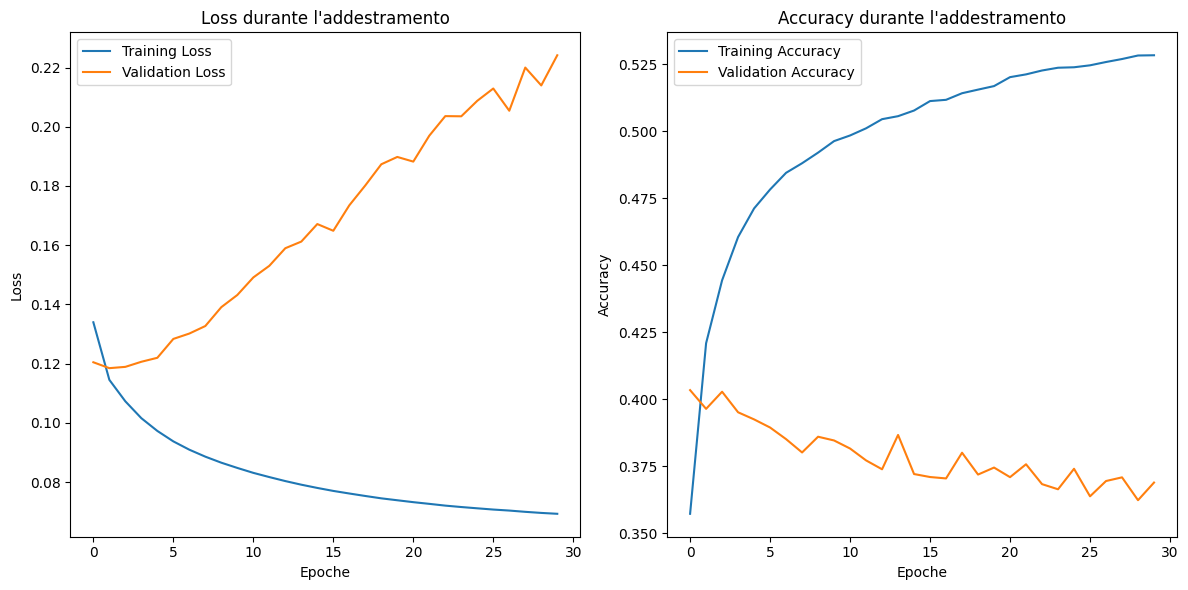

In [66]:
# Carica i dati salvati dal file JSON
with open('../trainHistory/training_history.json', 'r') as f:
    history_dict = json.load(f)
    
# Grafico della Loss
plt.figure(figsize=(12, 6))

# Plot della loss di addestramento e validazione
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Loss durante l\'addestramento')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.legend()

# Grafico dell'Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante l\'addestramento')
plt.xlabel('Epoche')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#----------------#
#Stesso discorso per matplotlib
# 10/10

### 11. Previsione per un Nuovo Esempio

In questa sezione, testiamo il modello con un esempio di testo. L'input è una frase che viene tokenizzata e trasformata in sequenze numeriche. Successivamente, il modello fornisce una previsione per ogni emozione, restituendo una probabilità associata a ciascuna. Il grafico mostra le **10 emozioni più probabili** con le rispettive probabilità.

#### 11.1. Risultati della Previsione
Il modello è stato testato con il testo:  
**"i wish you die"**. La previsione viene ordinata in base alle probabilità, e le emozioni con le probabilità più alte sono visualizzate in un grafico a barre orizzontali.

- Le **10 emozioni più probabili** sono mostrate nell'asse delle ordinate, con la probabilità in ascissa. L'asse Y è invertito per visualizzare prima le emozioni con probabilità più alte.

Questo grafico aiuta a capire come il modello classifica i sentimenti presenti nel testo in modo multilabel, considerando la sua capacità di prevedere diverse emozioni contemporaneamente.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


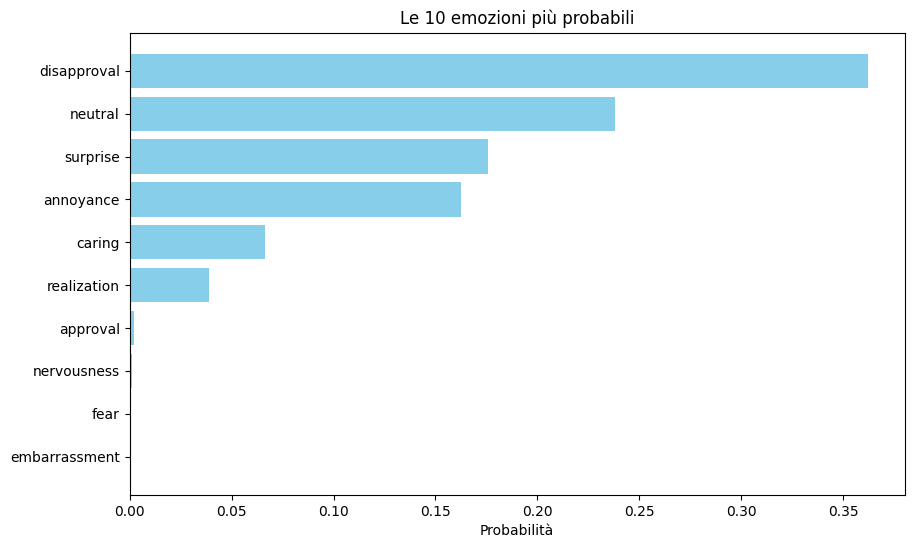

In [72]:
# Testa il modello con un nuovo esempio
import numpy as np

example_text = "this item is very useless"
example_sequence = tokenizer.texts_to_sequences([example_text])
example_padded = pad_sequences(example_sequence, maxlen=max_sequence_length)

# Previsione
predictions = model.predict(example_padded)

# Liste delle emozioni
emotions = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
            'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
            'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
            'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness',
            'surprise', 'neutral']

# Ordina le probabilità in ordine decrescente
sorted_indices = np.argsort(predictions[0])[::-1]
sorted_emotions = [emotions[i] for i in sorted_indices]
sorted_probabilities = [predictions[0][i] for i in sorted_indices]

# Limita il numero di emozioni da visualizzare (ad esempio le prime 10)
top_n = 10
top_n_emotions = sorted_emotions[:top_n]
top_n_probabilities = sorted_probabilities[:top_n]

# Crea il grafico
plt.figure(figsize=(10, 6))
plt.barh(top_n_emotions, top_n_probabilities, color='skyblue')
plt.xlabel('Probabilità')
plt.title('Le 10 emozioni più probabili')
plt.gca().invert_yaxis()  # Inverte l'asse Y per avere la probabilità più alta in cima
plt.show()

#---------------#
# Inferenza, risultati ottimi considerando il tempo necessario a sviluppare questo modello
# 9/10